# Investigating Fandangos Movie Ratings Part II

Die Filmbewertungs-Seite Fandango stand in der Vergangenheit in der
Kritik, systematisch Filmkritiken zu positiv abzubilden. Aufgedeckt wurde dies durch eine Analyse von Walt Hickey. Es konnte aufgezeigt werden, dass Fandango seine Bewertungen systematisch bis zu einem halben Bewertungs-Stern aufwertet. Auch konnte gezeigt werden (siehe Teil 1), dass Fandango im Vergleich zu anderen Filmbewertungs-Portalen (z.B. IMDB, Rotten Tomatoes, usw.) Filme im Schnitt deutlich positiver abbildet.

Nach der Offenlegung dieses Verfahrens äußerten sich Vertreter von Fandango, dass es sich um einen Bug handle und dass dieser behoben werde.

Das Ziel der vorliegenden Untersuchung ist es, zu analysieren ob diese Tendenz mittlerweile behoben wurde.

Datenquelle (Originaluntersuchung v. Walt Hickey):
https://github.com/fivethirtyeight/data/tree/master/fandango

Name als Datensatz "fandango_score_comparison.csv"

Datenquelle (Dataquest Filmbewertungen 2016/2017):
https://github.com/mircealex/Movie_ratings_2016_17

Name als Datensatz "movie_ratings_17_17.csv"

In [1]:
import pandas as pd

original_analysis=pd.read_csv("fandango_score_comparison.csv")
original_analysis.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
new_analysis=pd.read_csv("movie_ratings_16_17.csv")
new_analysis.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Der für die Auswertung relevante Teil beider Datensätze wird isoliert

In [3]:
fandango_old=original_analysis[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]]
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_new=new_analysis[["movie","year","fandango"]]
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Population= Fandangos Bewertungssystem

Repräsentativitätsprobleme:
1. Der erste Datensatz ist vor der Analyse erstellt worden, der zweite danach (Zeitproblem)
2. Kein Ramdom-Sampling
Im ersten Datensatz mussten folgende Kritieren erfüllt sein:
- Mindestens 30 Ratings
- Es mussten Tickets verkauft werden
Im zweiten Datensatz:
- 2016 oder später
- Popularität (Definition unklar)
3. Die Datensätze wurden mit umrissener Zielsetzung erhoben



https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

Folglich muss die Untersuchungsfrage eingeschränkt werden:
Gibt es Unterschiede in den Fandango-Bewertungen populärer Filme in 2015 und 2016?
(Definition populär: mind. 30 Bewertungen)

In [5]:
original_analysis[original_analysis["Fandango_votes"]>=30].shape[0]

146

In [6]:
original_analysis.shape[0]

146

Ein anderes Ergebnis hätte auch überrascht, dies war Grundvoraussetzung um in den Datensatz aufgenommen zu werden

In [7]:
new_analysis.columns 

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

Dieser Datensatz zeigt keine Möglichkeit an die Anzahl der User-Reviews zu überprüfen. Ein anderer Weg muss gesucht werden.

In [8]:
new_analysis.shape[0]

214

In [9]:
new_analysis["movie"].sample(22)

19                                 Beauty and the Beast
137                                        Ride Along 2
184                                The Legend of Tarzan
168                                    The Confirmation
81                          Jack Reacher: Never Go Back
142                                             Shut In
62                                         Ghostbusters
211                          xXx: Return of Xander Cage
47                                        Elvis & Nixon
132                                       Pete's Dragon
150                                              Storks
182                                     The Jungle Book
161                             The Autopsy of Jane Doe
115                                       Money Monster
90                        Kingsglaive: Final Fantasy XV
181                                     The Infiltrator
122                                          Nine Lives
151                                       Suicid

2/24 besitzen in diesem Sample keine Popularität nach unserer Definition. Das entspräche ca. 8%.

Als nächstes wird geprüft, ob die Filme auch den der Hypothese entsprechen den Jahren zugeordnet werden können.

In [10]:
new_analysis["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
original_analysis["FILM"].head()

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

Das Jahr ist in der Film-Spalte enthalten.

In [12]:
original_analysis["FILM"].str.rsplit("(",expand=True)[1].str.replace(")","").value_counts()

2015    129
2014     17
Name: 1, dtype: int64

In der Original-Analyse müssen die 17 Filme entfernt werden, die aus 2014 sind.

In der neuen Analyse diejenigen, die aus 2017 sind.

In [13]:
fandango_2016=new_analysis[new_analysis["year"]==2016].copy()

In [14]:
fandango_2016["year"].unique()

array([2016])

In [15]:
fandango_2015=original_analysis.copy()

In [16]:
fandango_2015["year"]=original_analysis["FILM"].str.rsplit("(",expand=True)[1].str.replace(")","")

In [17]:
fandango_2015.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015


In [18]:
fandango_2015=fandango_2015[fandango_2015["year"]=="2015"].copy()

In [19]:
fandango_2015["year"].unique()

array(['2015'], dtype=object)

Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. Customize the graph such that:

([<matplotlib.axis.XTick at 0x7f9ce45d0400>,
 <a list of 11 Text xticklabel objects>)

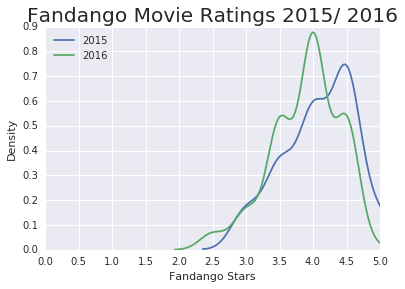

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.kdeplot(data=fandango_2015["Fandango_Stars"], label="2015", legend=True)
sns.kdeplot(data=fandango_2016["fandango"], label="2016", legend=True)

plt.style.use("fivethirtyeight")
plt.title("Fandango Movie Ratings 2015/ 2016")
plt.xlabel("Fandango Stars")
plt.ylabel("Density")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.5,.5))

Die Verteilung der Ratings von 2015 ist deutlich rechtssteil, mit einem Peak bei 4,5 Sternen.
Die Verteilung der Ratings von 2016 hingegen entspricht eher einer Normalverteilung (wenn auch weiterhin rechtssteil). Der Peak ist im Vergleich zu 2015 nach links verschoben und befindet sich bei 4 Sternen. Er ist höher als der Peak aus 2015.

Dies ist ein Hinweis darauf, dass sich das Bewertungs-System zwischen den Jahren geändert hat. Es zeigt sich allerdings bei beiden Verteilungen ein recht später Beginn (2 - 2,5 Sternen). Dies spricht dafür, dass die Skala weiterhin nicht vollständig ausgenutzt wird (bzw. werden kann).

Die Verteilung gibt ein Hinweis darauf, dass populäre Filme im Jahre 2016 von Fandango im Schnitt niedriger bewertet wurden als 2015.

# Analyse als Häufigkeitstabelle

In [21]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [22]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Die Richtung der Unterschiede ist auch in den relativen Häufigkeitstabellen ersichtlich. Bedarf aber näherer Untersuchung.

- Im Datensatz von 2015 finden sich keine Bewertungen unter 3 Sternen, dies ist im Datensatz von 2016 nicht der Fall
- 2015 enthält mehr 3,5 Sterne Bewertungen
- 2016 enthält allerdings deutlich mehr 4 Sterne-Bewertungen, dafür weniger 4,5 Sterne-Bewertungen als 2015
- Die Höchstwertung wurde 2016 deutlich seltener vergeben

In [23]:
fandango_2015["Fandango_Stars"].mean()

4.0852713178294575

In [24]:
fandango_2016["fandango"].mean()

3.887434554973822

Das arithmetische Mittel der Bewertungen ist um ca. 0,2 Sterne gesunken.
Das entspricht einem 1/5 eines Sternes, ist also ein kleiner Unterschied.

In [25]:
fandango_2015["Fandango_Stars"].median()

4.0

In [26]:
fandango_2016["fandango"].median()

4.0

Der Median ist gleich geblieben.

In [27]:
fandango_2015["Fandango_Stars"].mode()

0    4.5
dtype: float64

In [28]:
fandango_2016["fandango"].mode()

0    4.0
dtype: float64

Der Modalwert ist, wie in der Häufigkeitsverteilung ersichtlich, gesunken.
Dies entspricht einem halben Stern, also einer Kategorie.

Grafische Darstellung und Vergleich

In [29]:
summary=pd.DataFrame({"2015":[fandango_2015["Fandango_Stars"].mean(),4.0,4.5],"2016":[fandango_2016["fandango"].mean(),4.0,4.0]},index=["mean","median","mode"])

In [30]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


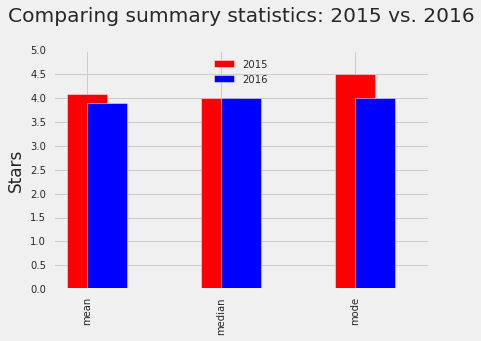

In [31]:
summary["2015"].plot.bar(color="red",legend=True, width=.3)
summary["2016"].plot.bar(align="edge",color="blue",legend=True, width=.3)
plt.legend(loc=9)
plt.ylim(0,5)
plt.yticks(np.arange(0,5.5,.5))
plt.title("Comparing summary statistics: 2015 vs. 2016", y=1.1)
plt.ylabel("Stars")
plt.show()

Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating.

Herangehensweise 1.
Ich suche das Filmportal mit der geringsten Abweichung vom Mittelwert aller Filmbewertungsportale über alle Filme hinweg. (Diese Möglichkeite besitzt natürlich Vor- und Nachteile, die ich am Ende diskutieren werde).

In [32]:
fandango_2016.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

Eine Extra-Spalte zur Anzeige des Mittelwertes wird dem Datensatz hinzugefügt.

In [33]:
fandango_2016["mean_all_sites"]=fandango_2016[["n_metascore","n_imdb","n_tmeter","n_audience"]].apply(lambda x: x.mean(), axis=1)

Abstände bestimmen. In den Datensatz.

In [34]:
fandango_2016["delta_metascore"]=fandango_2016["n_metascore"]-fandango_2016["mean_all_sites"]

In [35]:
fandango_2016["delta_imdb"]=fandango_2016["n_imdb"]-fandango_2016["mean_all_sites"]

In [36]:
fandango_2016["delta_tmeter"]=fandango_2016["n_tmeter"]-fandango_2016["mean_all_sites"]

In [37]:
fandango_2016["delta_audience"]=fandango_2016["n_audience"]-fandango_2016["mean_all_sites"]

In [38]:
fandango_2016.head(1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience,mean_all_sites,delta_metascore,delta_imdb,delta_tmeter,delta_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.6,4.5,3.95,4.0,3.5,4.5,4.0,3.9625,-0.1625,-0.3625,0.5375,-0.0125


In [39]:
fandango_2016["delta_metascore"].describe()

count    191.000000
mean      -0.201702
std        0.311549
min       -0.950000
25%       -0.400000
50%       -0.212500
75%        0.000000
max        0.625000
Name: delta_metascore, dtype: float64

In [40]:
fandango_2016["delta_imdb"].describe()

count    191.000000
mean       0.345419
std        0.529621
min       -0.612500
25%       -0.168750
50%        0.375000
75%        0.800000
max        1.325000
Name: delta_imdb, dtype: float64

In [41]:
fandango_2016["delta_tmeter"].describe()

count    191.000000
mean      -0.165838
std        0.662966
min       -1.862500
25%       -0.743750
50%       -0.137500
75%        0.425000
max        1.112500
Name: delta_tmeter, dtype: float64

In [42]:
fandango_2016["delta_audience"].describe()

count    191.000000
mean       0.022120
std        0.430714
min       -1.225000
25%       -0.275000
50%        0.000000
75%        0.281250
max        1.387500
Name: delta_audience, dtype: float64

Bei dieser Interpretation ist der Standardabweichung der Vorzug zu geben, da es bei den Mittelwerten Ausgleiche geben könnte. Nach erster Analyse liegt der Metascore am besten. Dies soll grafisch veranschaulicht werden. 

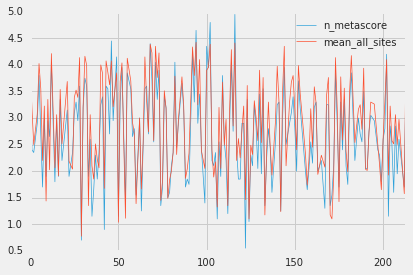

In [43]:
fandango_2016[["n_metascore","mean_all_sites"]].plot.line(linewidth=.7)

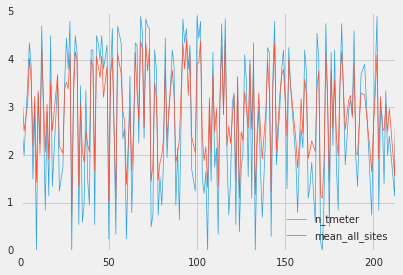

In [44]:
fandango_2016[["n_tmeter","mean_all_sites"]].plot.line(linewidth=.7)

Auf den Grafiken ist es deutlich zu sehen. Der Metacritic_Score unterschätzt systematisch die Durchschnittsbewertung, ist aber für jeden Film recht nah an der eigentlichen Bewertung (-> niedrige Standardabweichung).
Auf der unteren Grafik zeigt sich eine deutliche Überschätzung der jeweiligen Richtungstendenz. Obwohl die Abweichungen größer sind, zeigt sich ein kleinerer Mittelwert(!). Dies ist der Fall, da sich die Richtungen, wie oben vermutet, ausgleichen. Die Standardabweichung ist also wie vermutet der deutlich bessere Wert zur Ermittlung der Vorhersage-Güte.

Die Audience-Bewertung liegt auch sehr nahe am Mittelwert, sie zeigt die kleinste Abweichung, allerdings eine höhere Standardabweichung als der Metacritic-Score. Dies wird in der folgenden Grafik näher beleuchtet.

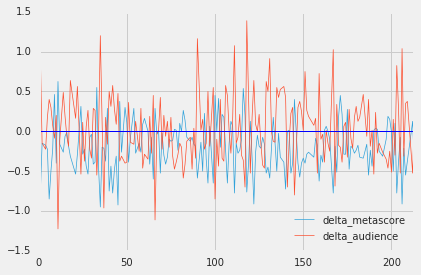

In [45]:
fandango_2016[["delta_metascore","delta_audience"]].plot.line(linewidth=.7)
plt.axhline(y=0,linewidth=1)

In [46]:
fandango_2016.shape[0]

191

Es zeigen sich bei Audience deutlich stärkere Abweichungen vom Mittelwert. Dies bekräftigt die Auswahl über die reine Standardabweichung für den Metascore. Interessant ist eine Untersuchung bei weglassen der "Ausreißer".

In [49]:
test_sample=fandango_2016[fandango_2016["delta_audience"]<1]
test_sample=test_sample[fandango_2016["delta_audience"]>-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [50]:
test_sample.shape[0]

183

8 Zeilen sind nicht übernommen worden. Wir geben die Grafik erneut aus.

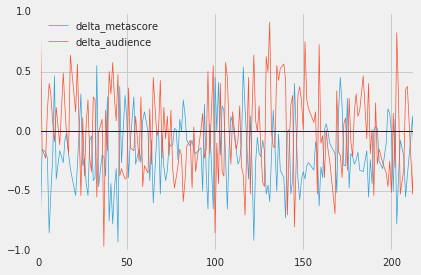

In [51]:
test_sample[["delta_metascore","delta_audience"]].plot.line(linewidth=.7)
plt.axhline(y=0,linewidth=1)

Das Weglassen der Extremwerte zeigt eine sichtliche Verbesserung in der Genauigkeit. Dennoch scheint es augenscheinlich, dass der Meta-Score weiterhin leicht näher am "wahren Wert" liegt.

In [52]:
test_sample["delta_audience"].describe()

count    183.000000
mean      -0.001776
std        0.367671
min       -0.962500
25%       -0.275000
50%       -0.012500
75%        0.262500
max        0.975000
Name: delta_audience, dtype: float64

In [53]:
test_sample["delta_metascore"].describe()

count    183.000000
mean      -0.189481
std        0.289998
min       -0.925000
25%       -0.387500
50%       -0.200000
75%        0.000000
max        0.550000
Name: delta_metascore, dtype: float64

Trotz signifikanter Verbesserung ist der Meta-Score dennoch ein Maß, welches sich näher an der Mitte befindet.

Abschlussdiskussion zur Beantwortung der Frage: "Was ist die beste Websites für aggregierte Filmkritiken?"
Eigenschaften dieser Methode:
- Starke Abhänigkeit von den aufgenommen Datensätzen (allerdings Gegenargument in diesem Fall: Es sind die größten und einflussreichsten Websiten aufgenommen worden).
- Keine externe Validierung des Kriteriums notwendig (was hier sowieso schwierig wäre).

Alternativ wäre auch eine Untersuchung der Bewertungsverteilungen der einzelnen Seiten möglich gewesen, wie es in diesem Artikel vorgenommen wurde: https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19

Der Autor des Artikels kommt zum gleichen Schluss wie ich in meiner Untersuchung, was zeigt, dass ein gutes Maß gewählt wurde.